# Ionosphere

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.interpolate import RegularGridInterpolator
from powerbox import LogNormalPowerBox, get_power

In [2]:
pb = LogNormalPowerBox(512,lambda k : (k/0.0000000001)**(-3./3.), dim=2, boxlength=10.)
delx = pb.delta_x

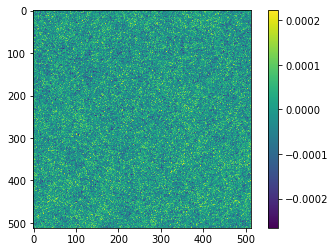

In [3]:
plt.imshow(delx)
plt.colorbar()

In [5]:
Cl = 1. # Should make this right but anyway...
grad_phi = np.gradient(delx,pb.dx)
#grad2_phi = np.gradient(grad_phi,pb.dx)

gphi_x_fnc = RegularGridInterpolator((pb.x, pb.x),grad_phi[0])
gphi_y_fnc = RegularGridInterpolator((pb.x, pb.x),grad_phi[1])

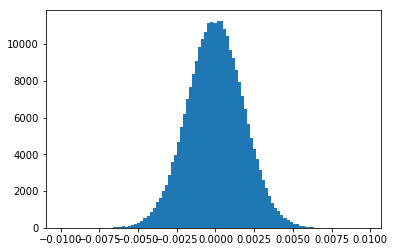

In [10]:
plt.hist(grad_phi[1].flatten(),bins=100)
plt.show()

In [11]:
from scipy.signal import correlate2d

In [12]:
selfcorr = correlate2d(grad_phi[0],grad_phi[0])

KeyboardInterrupt: 

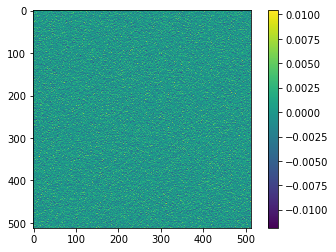

In [6]:
plt.imshow(grad_phi[0])
plt.colorbar()

# plt.imshow(grad2_phi[0])
# plt.colorbar()


In [168]:
#pos = np.random.uniform(-0.8,0.795,size=(10000000,2))
x = np.linspace(pb.x.min(),pb.x.max(),3000)
X,Y = np.meshgrid(x,x)
pos = np.array([X.flatten(),Y.flatten()]).T

In [173]:
newpos = np.zeros_like(pos)
newpos[:,0] = pos[:,0] + Cl*gphi_x_fnc(pos)
newpos[:,1] = pos[:,1] + Cl*gphi_y_fnc(pos)

In [175]:
for i in range(2):
    newpos[:,i][newpos[:,i]<pb.x.min()] = pb.boxlength + newpos[:,i][newpos[:,i]<pb.x.min()]
    newpos[:,i][newpos[:,i]>pb.x.max()] = -pb.boxlength + newpos[:,i][newpos[:,i]>pb.x.max()]
    

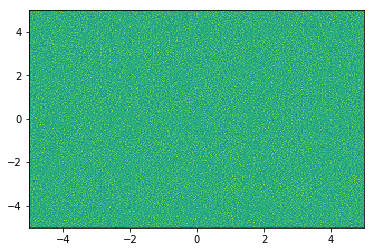

In [176]:
plt.hist2d(newpos[:,0],newpos[:,1],bins=300)
plt.show()

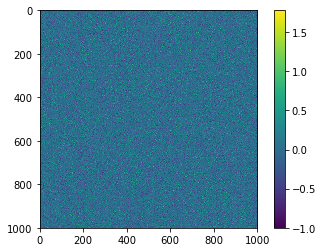

In [177]:
delx_new = np.histogram2d(newpos[:,0],newpos[:,1],bins=1000)[0]
delx_new = delx_new/np.mean(delx_new) -1
plt.imshow(delx_new)
plt.colorbar()

In [178]:
pk,k = get_power(delx_new,pb.boxlength)

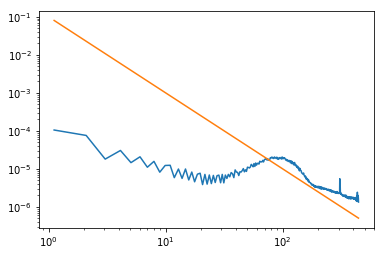

In [179]:
plt.plot(k,pk)
#plt.axhline(1./(len(pos)/len(delx_new)**2))
plt.plot(k,1e-1 * k**(-3./3. -3./3.))
plt.xscale('log')
plt.yscale('log')